# Analysis results visualization

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'../')
from util import *

from FP import *

from fractions import Fraction
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler


torch.set_default_dtype(torch.float64)

device = "cuda" if torch.cuda.is_available() else "cpu"

is_band_limit=False
if is_band_limit==True:
    out_dir = 'output_band'
else:
    out_dir = 'output'

plt.rcParams['axes.prop_cycle'] = cycler('color', ['#2ca02c', '#d62728', '#9467bd', '#e377c2', '#bcbd22', '#17becf'])

plt.rcParams['figure.figsize'] = [6, 3]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams.update({'font.size': 12})

ap = 0.618


N_hr = 256
method = 'gs_gd'

ratio_aperture_obj = [1/8, 2/8, 3/8, 4/8, 5/8, 6/8, 7/8]
ratio_spacing_aperture = [1/8, 2/8, 3/8, 4/8, 5/8, 6/8, 7/8]
photons = [1e2, 1e3, 1e4, 1e5, 1e6]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## MSE vs. aperture size

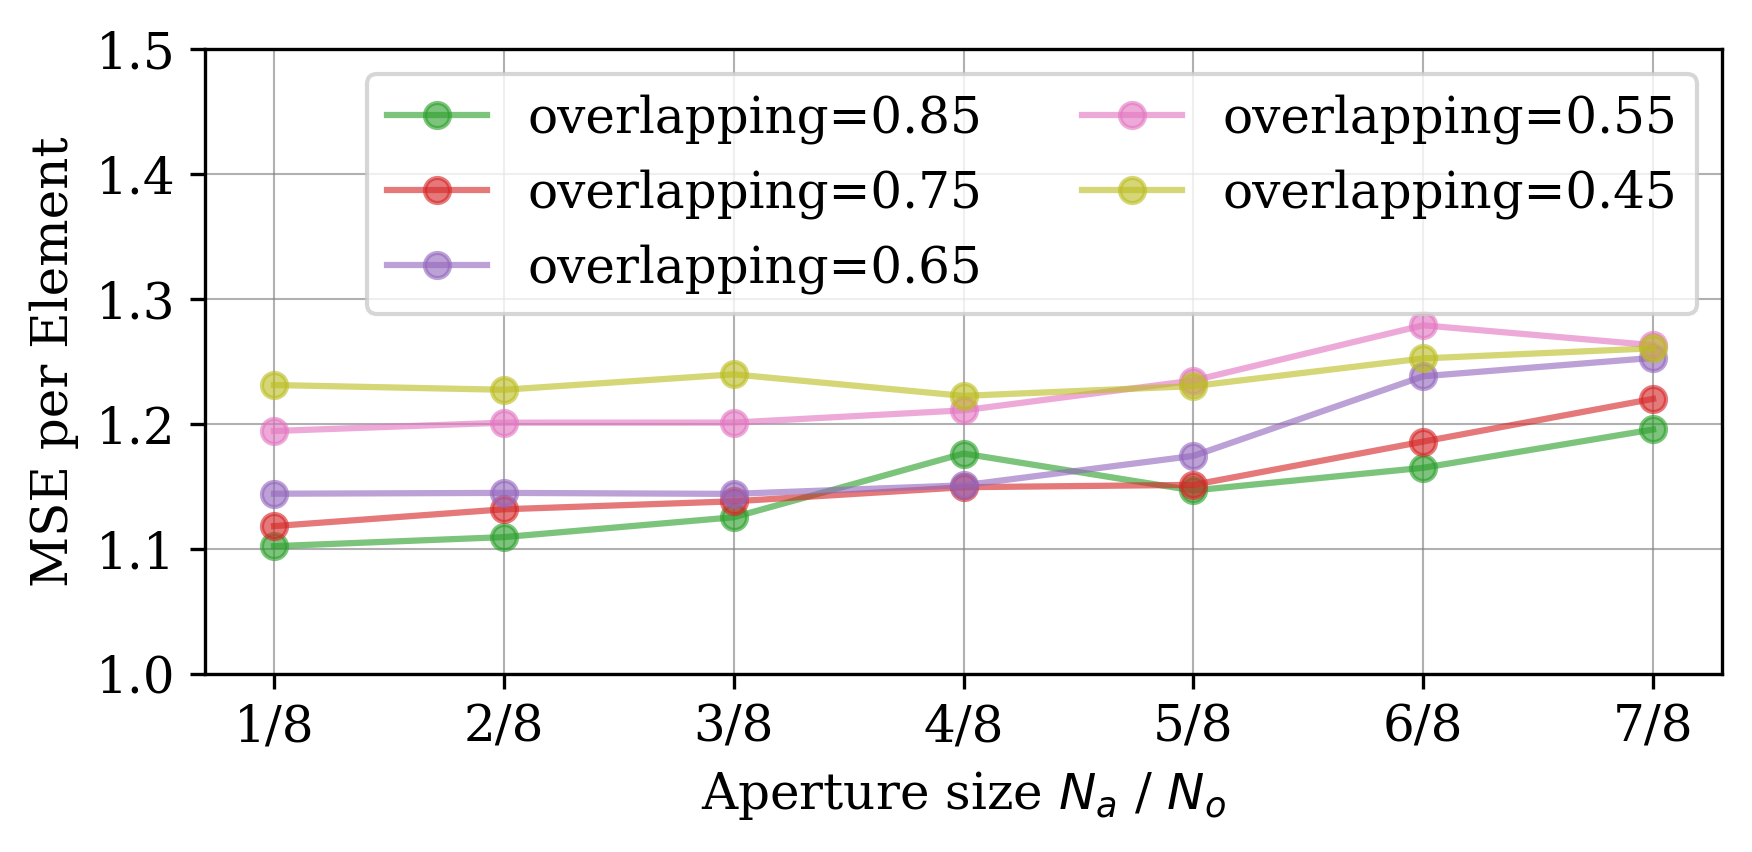

In [2]:
N_lrs= [1, 2, 3, 4, 5, 6, 7]
ol_ratio = [f'{ol}/8' for ol in N_lrs]

fig, ax = plt.subplots()

s=0.15
[MSE_cpx_list, MSE_ang_list, MSE_amp_list, PSNR_ang_list, PSNR_amp_list]= np.load(f'./{out_dir}/mse_vs_aperture_size_s{s}.npy')    
ax.plot(N_lrs, MSE_ang_list, '-o', label=f'overlapping={1-0.15}', alpha=ap )

s=0.25
[MSE_cpx_list, MSE_ang_list, MSE_amp_list, PSNR_ang_list, PSNR_amp_list]= np.load(f'./{out_dir}/mse_vs_aperture_size_s{s}.npy')    
ax.plot(N_lrs, MSE_ang_list, '-o', label=f'overlapping={1-0.25}', alpha=ap )

s=0.35
[MSE_cpx_list, MSE_ang_list, MSE_amp_list, PSNR_ang_list, PSNR_amp_list]= np.load(f'./{out_dir}/mse_vs_aperture_size_s{s}.npy')    
ax.plot(N_lrs, MSE_ang_list, '-o', label=f'overlapping={1-0.35}', alpha=ap )

s=0.45
[MSE_cpx_list, MSE_ang_list, MSE_amp_list, PSNR_ang_list, PSNR_amp_list]= np.load(f'./{out_dir}/mse_vs_aperture_size_s{s}.npy')    
ax.plot(N_lrs, MSE_ang_list, '-o', label=f'overlapping={1-0.45}', alpha=ap )

s=0.55
[MSE_cpx_list, MSE_ang_list, MSE_amp_list, PSNR_ang_list, PSNR_amp_list]= np.load(f'./{out_dir}/mse_vs_aperture_size_s{s}.npy')    
ax.plot(N_lrs, MSE_ang_list, '-o', label=f'overlapping={1-0.55:.2f}', alpha=ap )

# s=0.65
# [MSE_cpx_list, MSE_ang_list, MSE_amp_list, PSNR_ang_list, PSNR_amp_list]= np.load(f'./{out_dir}/mse_vs_aperture_size_s{s}.npy')    # load aperture dsitributions
# ax.plot(N_lrs, MSE_ang_list, '-o', label=f'overlapping={1-0.65}', alpha=ap )


# s=0.75
# [MSE_cpx_list, MSE_ang_list, MSE_amp_list, PSNR_ang_list, PSNR_amp_list]= np.load(f'./{out_dir}/mse_vs_aperture_size_s{s}.npy')    # load aperture dsitributions
# ax.plot(N_lrs, MSE_ang_list, '-o', label='s=0.75', alpha=ap )


ax.set_ylim(1, 1.5)       
ax.grid(which='both', color='gray', linestyle='-', linewidth=0.5, alpha=ap )
ax.grid(which='minor', alpha=0.3)
ax.set_xticks(ticks=N_lrs, labels=ol_ratio)
ax.set_xlabel(r'Aperture size $N_a$ / $N_o$')
ax.set_ylabel('MSE per Element')
ax.legend(ncol=2)


plt.tight_layout()
plt.savefig(f'./{out_dir}/mse_vs_aperture_size.pdf', format="pdf")
plt.show()




## MSE vs. aperture number

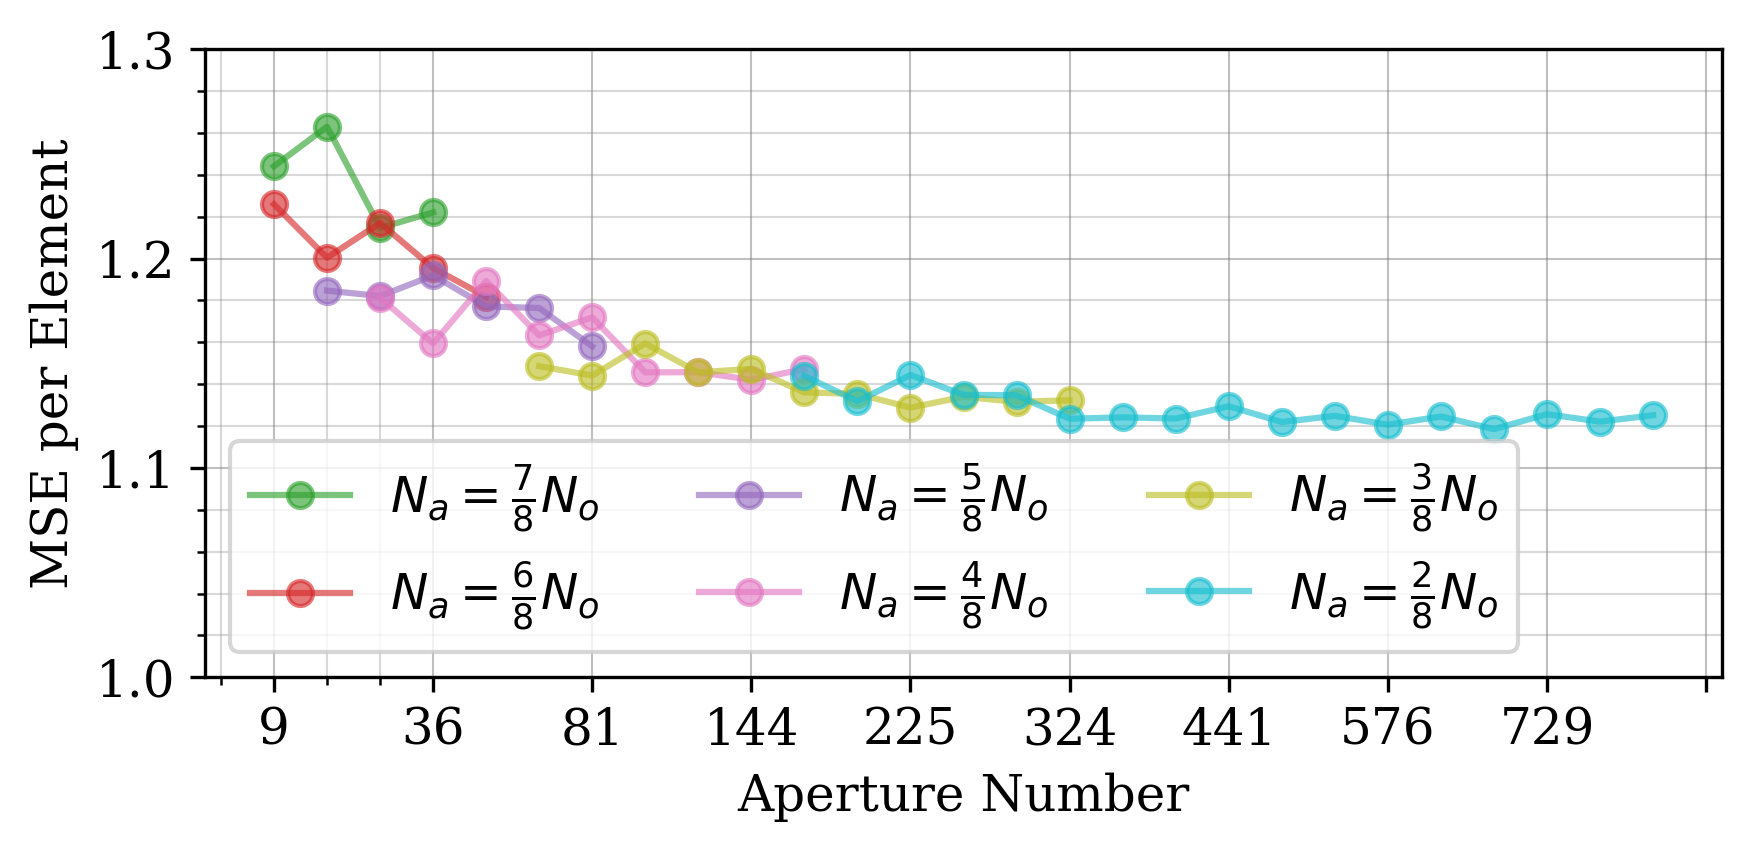

In [3]:
from matplotlib.ticker import AutoLocator, LinearLocator
import matplotlib.ticker as mticks
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)


fig, ax = plt.subplots()


N_lr = 224
N_pupils = np.arange(2, 7, 1)
ol_ratio = [f'{ol**2}' for ol in N_pupils]
[MSE_cpx_list, MSE_ang_list, MSE_amp_list, PSNR_ang_list, PSNR_amp_list]= np.load(f'./{out_dir}/mse_vs_aperture_number_Nlr{N_lr}.npy')    
ax.plot(N_pupils, MSE_ang_list, '-o', label=r'$N_{a} = \frac{7}{8} N_o$', alpha=ap)


N_lr = 192
N_pupils = np.arange(2, 8, 1)
ol_ratio = [f'{ol**2}' for ol in N_pupils]
[MSE_cpx_list, MSE_ang_list, MSE_amp_list, PSNR_ang_list, PSNR_amp_list]= np.load(f'./{out_dir}/mse_vs_aperture_number_Nlr{N_lr}.npy')    
ax.plot(N_pupils, MSE_ang_list, '-o', label=r'$N_{a} = \frac{6}{8} N_o$', alpha=ap)


N_lr = 160
N_pupils = np.arange(2, 10, 1)
ol_ratio = [f'{ol**2}' for ol in N_pupils]
[MSE_cpx_list, MSE_ang_list, MSE_amp_list, PSNR_ang_list, PSNR_amp_list]= np.load(f'./{out_dir}/mse_vs_aperture_number_Nlr{N_lr}.npy')    
ax.plot(N_pupils, MSE_ang_list, '-o', label=r'$N_{a} = \frac{5}{8} N_o$', alpha=ap)


N_lr = 128
N_pupils = np.arange(2, 14, 1)
ol_ratio = [f'{ol**2}' for ol in N_pupils]
[MSE_cpx_list, MSE_ang_list, MSE_amp_list, PSNR_ang_list, PSNR_amp_list]= np.load(f'./{out_dir}/mse_vs_aperture_number_Nlr{N_lr}.npy')    
ax.plot(N_pupils, MSE_ang_list, '-o', label=r'$N_{a} = \frac{4}{8} N_o$', alpha=ap)


N_lr = 96
N_pupils = np.arange(2, 19, 1)
ol_ratio = [f'{ol**2}' for ol in N_pupils]
[MSE_cpx_list, MSE_ang_list, MSE_amp_list, PSNR_ang_list, PSNR_amp_list]= np.load(f'./{out_dir}/mse_vs_aperture_number_Nlr{N_lr}.npy')    
ax.plot(N_pupils, MSE_ang_list, '-o', label=r'$N_{a} = \frac{3}{8} N_o$', alpha=ap)


N_lr = 64
N_pupils = np.arange(2, 30, 1)
ol_ratio = [f'{ol**2}' for ol in N_pupils]
[MSE_cpx_list, MSE_ang_list, MSE_amp_list, PSNR_ang_list, PSNR_amp_list]= np.load(f'./{out_dir}/mse_vs_aperture_number_Nlr{N_lr}.npy')    
ax.plot(N_pupils, MSE_ang_list, '-o', label=r'$N_{a} = \frac{2}{8} N_o$', alpha=ap)


ax.set_yticks(ticks=np.arange(1, 1.3, 0.02), minor=True)       
ax.set_xticks(ticks=np.arange(2, 6, 1), minor=True)  
ax.grid(which='both', color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
ax.grid(which='minor', alpha=0.3)
ax.set_xticks(ticks=N_pupils, labels=ol_ratio)
ax.xaxis.set_major_locator(MultipleLocator(3))
ax.set_xlabel(r'Aperture Number')
ax.set_ylabel('MSE per Element')
ax.legend(ncol=3)


plt.tight_layout()
plt.savefig(f'./{out_dir}/mse_vs_aperture_number.pdf', format="pdf", bbox_inches="tight")
plt.show()


## MSE vs. overlapping ratio

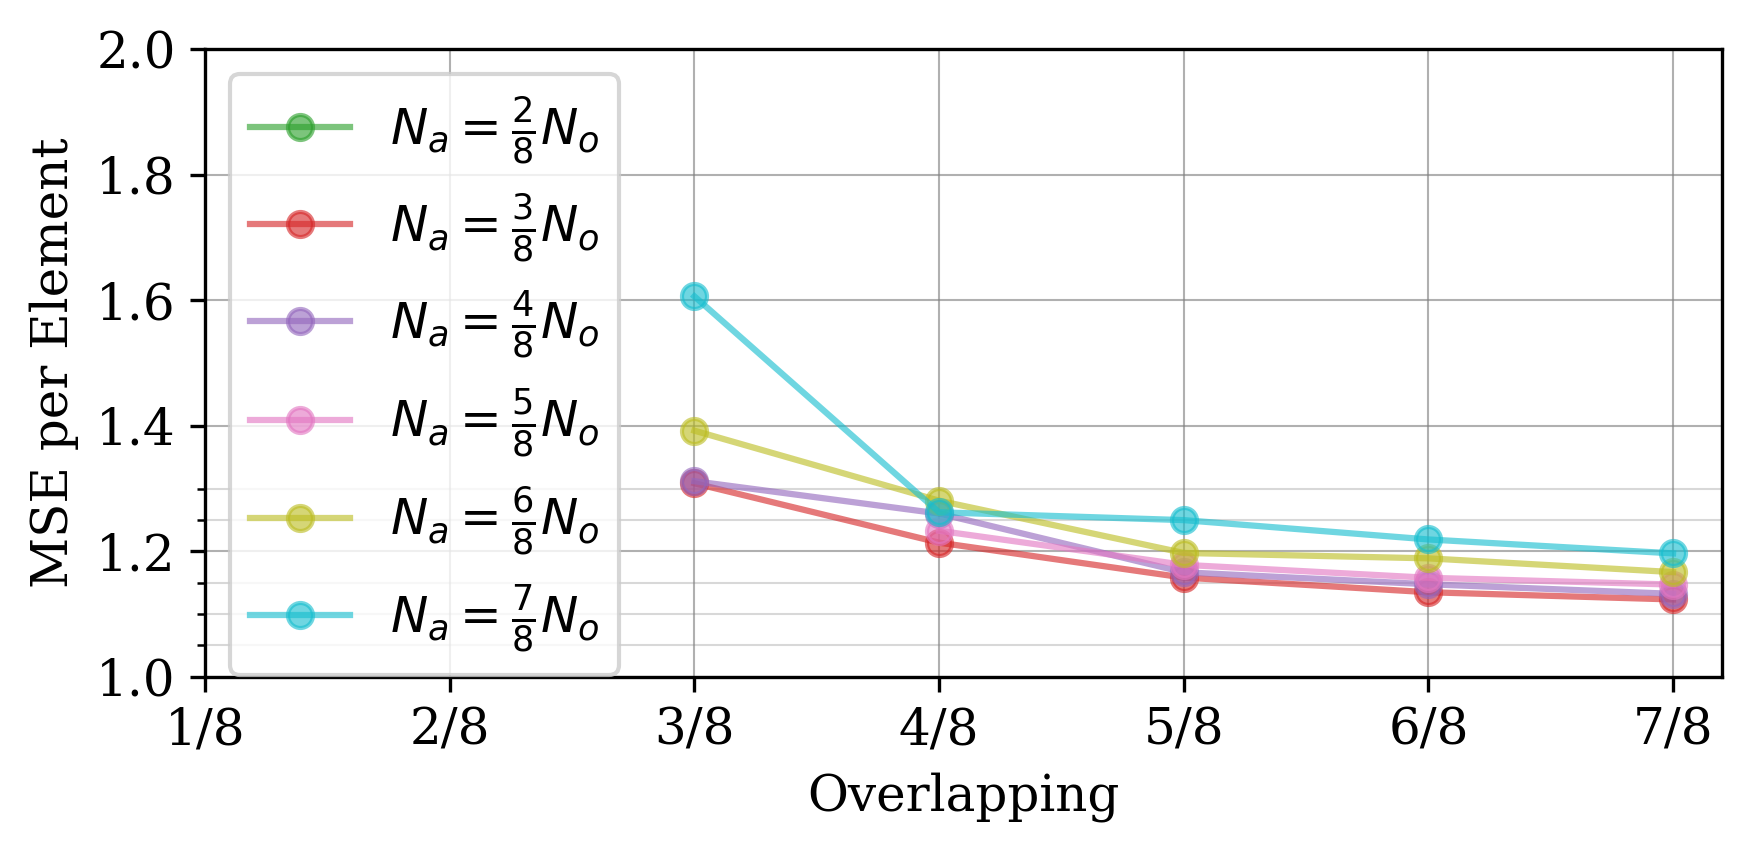

In [4]:
N_lrs= [1, 2, 3, 4, 5, 6, 7]
ol_ratio = [f'{8-ol}/8' for ol in N_lrs]

fig, ax = plt.subplots()


N_lr = 64
[MSE_cpx_list, MSE_ang_list, MSE_amp_list, PSNR_ang_list, PSNR_amp_list]= np.load(f'./{out_dir}/mse_vs_overlapping_Nlr{N_lr}.npy')    
ax.plot(ol_ratio, MSE_ang_list, '-o', label=r'$N_a=\frac{2}{8} N_o$', alpha=ap)

N_lr = 96
[MSE_cpx_list, MSE_ang_list, MSE_amp_list, PSNR_ang_list, PSNR_amp_list]= np.load(f'./{out_dir}/mse_vs_overlapping_Nlr{N_lr}.npy')    
ax.plot(ol_ratio, MSE_ang_list, '-o', label=r'$N_a=\frac{3}{8} N_o$', alpha=ap)

N_lr = 128
[MSE_cpx_list, MSE_ang_list, MSE_amp_list, PSNR_ang_list, PSNR_amp_list]= np.load(f'./{out_dir}/mse_vs_overlapping_Nlr{N_lr}.npy')    
ax.plot(ol_ratio, MSE_ang_list, '-o', label=r'$N_a=\frac{4}{8} N_o$', alpha=ap)

N_lr = 160
[MSE_cpx_list, MSE_ang_list, MSE_amp_list, PSNR_ang_list, PSNR_amp_list]= np.load(f'./{out_dir}/mse_vs_overlapping_Nlr{N_lr}.npy')    
ax.plot(ol_ratio, MSE_ang_list, '-o', label=r'$N_a=\frac{5}{8} N_o$', alpha=ap)

N_lr = 192
[MSE_cpx_list, MSE_ang_list, MSE_amp_list, PSNR_ang_list, PSNR_amp_list]= np.load(f'./{out_dir}/mse_vs_overlapping_Nlr{N_lr}.npy')    
ax.plot(ol_ratio, MSE_ang_list, '-o', label=r'$N_a=\frac{6}{8} N_o$', alpha=ap)

N_lr = 224
[MSE_cpx_list, MSE_ang_list, MSE_amp_list, PSNR_ang_list, PSNR_amp_list]= np.load(f'./{out_dir}/mse_vs_overlapping_Nlr{N_lr}.npy')    
ax.plot(ol_ratio, MSE_ang_list, '-o', label=r'$N_a=\frac{7}{8} N_o$', alpha=ap)

ax.set_ylim(1, 2)
ax.set_yticks(ticks=np.arange(1, 1.3, 0.05), minor=True)           
ax.grid(which='both', color='gray', linestyle='-', linewidth=0.5, alpha=ap)
ax.grid(which='minor', alpha=0.3)
ax.set_xticks(ticks=ol_ratio, labels=ol_ratio)
ax.set_xlabel(r'Overlapping')
ax.set_ylabel('MSE per Element')
ax.legend(ncol=1)


plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig(f'./{out_dir}/mse_vs_overlapping.pdf', format="pdf")
plt.show()


## MSE vs. overlapping ratio 3x3

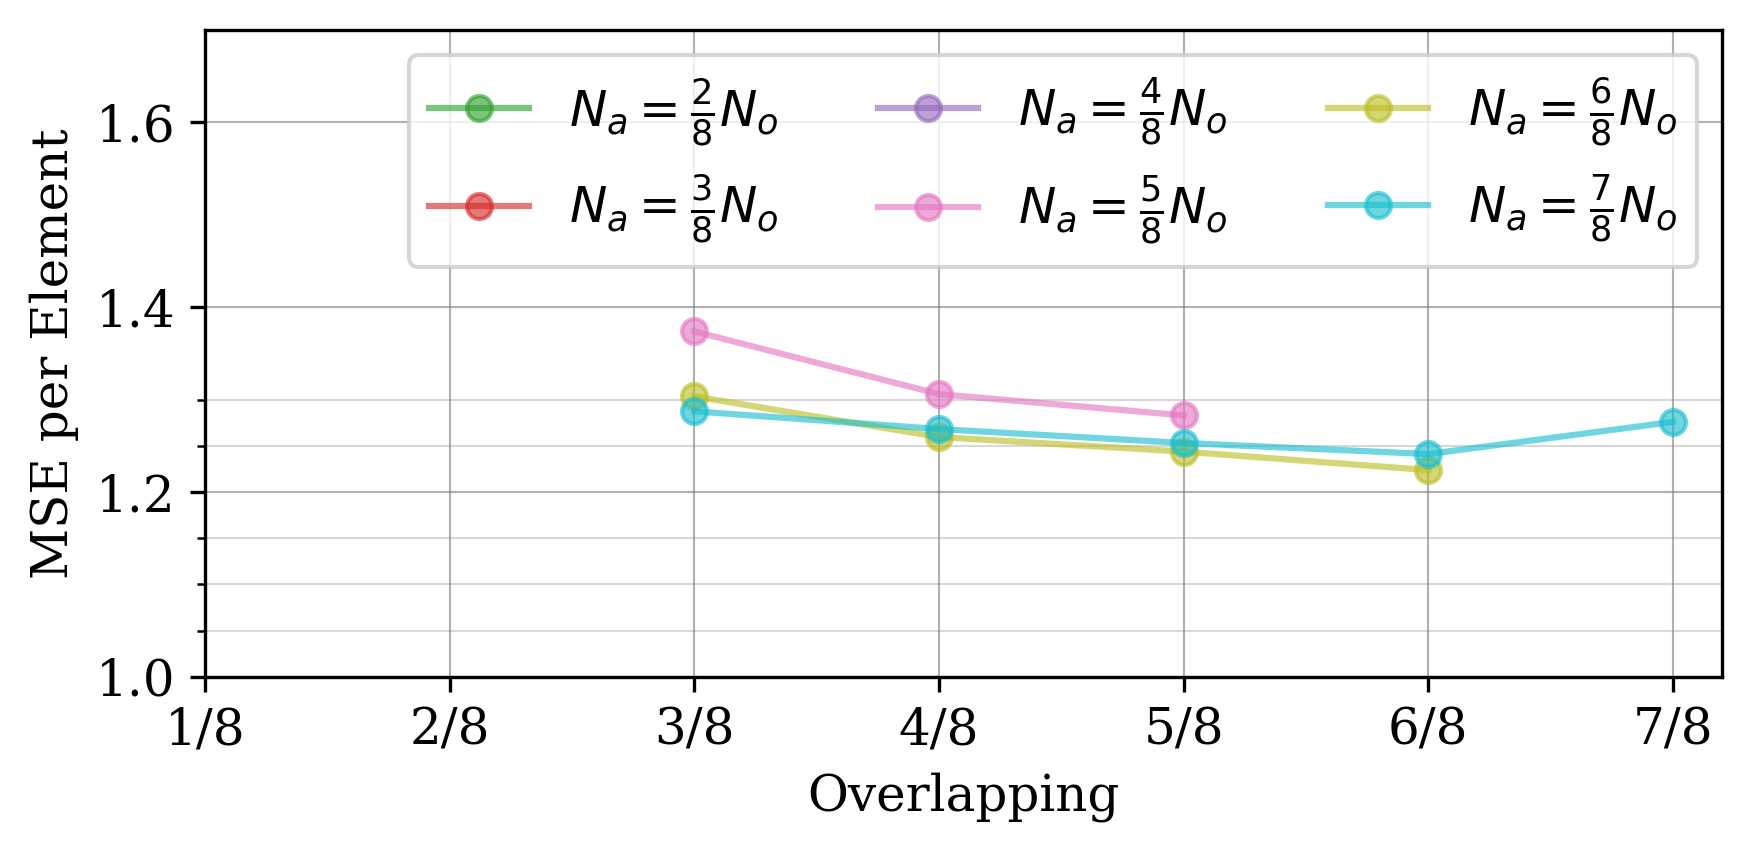

In [6]:
N_lrs= [1, 2, 3, 4, 5, 6, 7]
ol_ratio = [f'{8-ol}/8' for ol in N_lrs]


fig, ax = plt.subplots()


N_lr = 64
[MSE_cpx_list, MSE_ang_list, MSE_amp_list, PSNR_ang_list, PSNR_amp_list]= np.load(f'./{out_dir}/mse_vs_overlapping_Nlr{N_lr}_A3x3.npy')    
ax.plot(ol_ratio, MSE_ang_list, '-o', label=r'$N_a=\frac{2}{8} N_o$', alpha=ap)


N_lr = 96
[MSE_cpx_list, MSE_ang_list, MSE_amp_list, PSNR_ang_list, PSNR_amp_list]= np.load(f'./{out_dir}/mse_vs_overlapping_Nlr{N_lr}_A3x3.npy')    
ax.plot(ol_ratio, MSE_ang_list, '-o', label=r'$N_a=\frac{3}{8} N_o$', alpha=ap)


N_lr = 128
[MSE_cpx_list, MSE_ang_list, MSE_amp_list, PSNR_ang_list, PSNR_amp_list]= np.load(f'./{out_dir}/mse_vs_overlapping_Nlr{N_lr}_A3x3.npy')    
ax.plot(ol_ratio, MSE_ang_list, '-o', label=r'$N_a=\frac{4}{8} N_o$', alpha=ap)


N_lr = 160
[MSE_cpx_list, MSE_ang_list, MSE_amp_list, PSNR_ang_list, PSNR_amp_list]= np.load(f'./{out_dir}/mse_vs_overlapping_Nlr{N_lr}_A3x3.npy')    
ax.plot(ol_ratio, MSE_ang_list, '-o', label=r'$N_a=\frac{5}{8} N_o$', alpha=ap)


N_lr = 192
[MSE_cpx_list, MSE_ang_list, MSE_amp_list, PSNR_ang_list, PSNR_amp_list]= np.load(f'./{out_dir}/mse_vs_overlapping_Nlr{N_lr}_A3x3.npy')    
ax.plot(ol_ratio, MSE_ang_list, '-o', label=r'$N_a=\frac{6}{8} N_o$', alpha=ap)


N_lr = 224
[MSE_cpx_list, MSE_ang_list, MSE_amp_list, PSNR_ang_list, PSNR_amp_list]= np.load(f'./{out_dir}/mse_vs_overlapping_Nlr{N_lr}_A3x3.npy')    
ax.plot(ol_ratio, MSE_ang_list, '-o', label=r'$N_a=\frac{7}{8} N_o$', alpha=ap)


ax.set_ylim(1, 1.7)
ax.set_yticks(ticks=np.arange(1, 1.3, 0.05), minor=True)           
ax.grid(which='both', color='gray', linestyle='-', linewidth=0.5, alpha=ap)
ax.grid(which='minor', alpha=0.3)
ax.set_xticks(ticks=ol_ratio, labels=ol_ratio)
ax.set_xlabel(r'Overlapping')
ax.set_ylabel('MSE per Element')
ax.legend(ncol=3)


plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig(f'./{out_dir}/mse_vs_overlapping_A3x3.pdf', format="pdf")
plt.show()

## MSE vs. Aperture Number and phase complexity


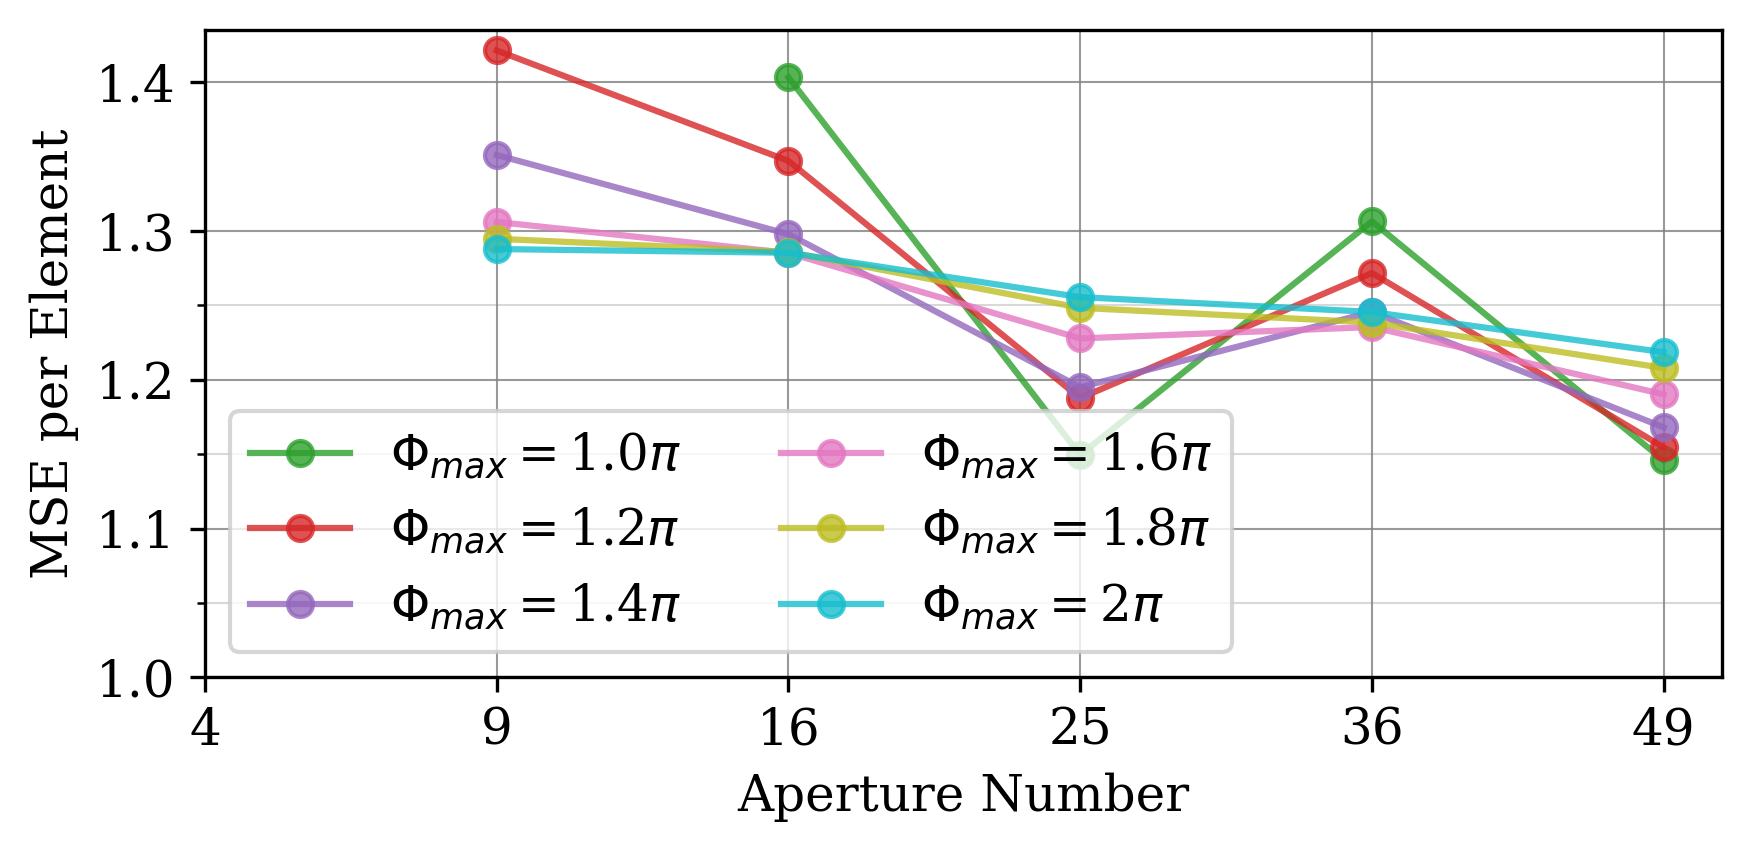

In [5]:
N_pupils = np.arange(2, 8, 1)
ol_ratio = [f'{ol**2}' for ol in N_pupils]


fig, ax = plt.subplots()
for N_phi in [0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    [MSE_cpx_list, MSE_ang_list, MSE_amp_list, PSNR_ang_list, PSNR_amp_list]= np.load(f'./{out_dir}/mse_vs_aperture_number_phi{N_phi}.npy')    

    ax.plot(N_pupils, MSE_ang_list, '-o', label=r'$\Phi_{max}=$' + f'{N_phi*2}'+r'$\pi$', alpha=0.8)

    ax.set_yticks(ticks=np.arange(1, 1.3, 0.05), minor=True)
    ax.grid(which='both', color='gray', linestyle='-', linewidth=0.5, alpha=0.8)
    ax.grid(which='minor', alpha=0.3)
    ax.set_xticks(ticks=N_pupils, labels=ol_ratio)
    ax.set_xlabel(r'Aperture Number')
    ax.set_ylabel('MSE per Element')
    ax.legend(ncol=2)


plt.tight_layout()
plt.savefig(f'./{out_dir}/mse_vs_aperture_number_complexity.pdf', format="pdf")
plt.show()

## MSE vs. Aperture Size and phase complexity

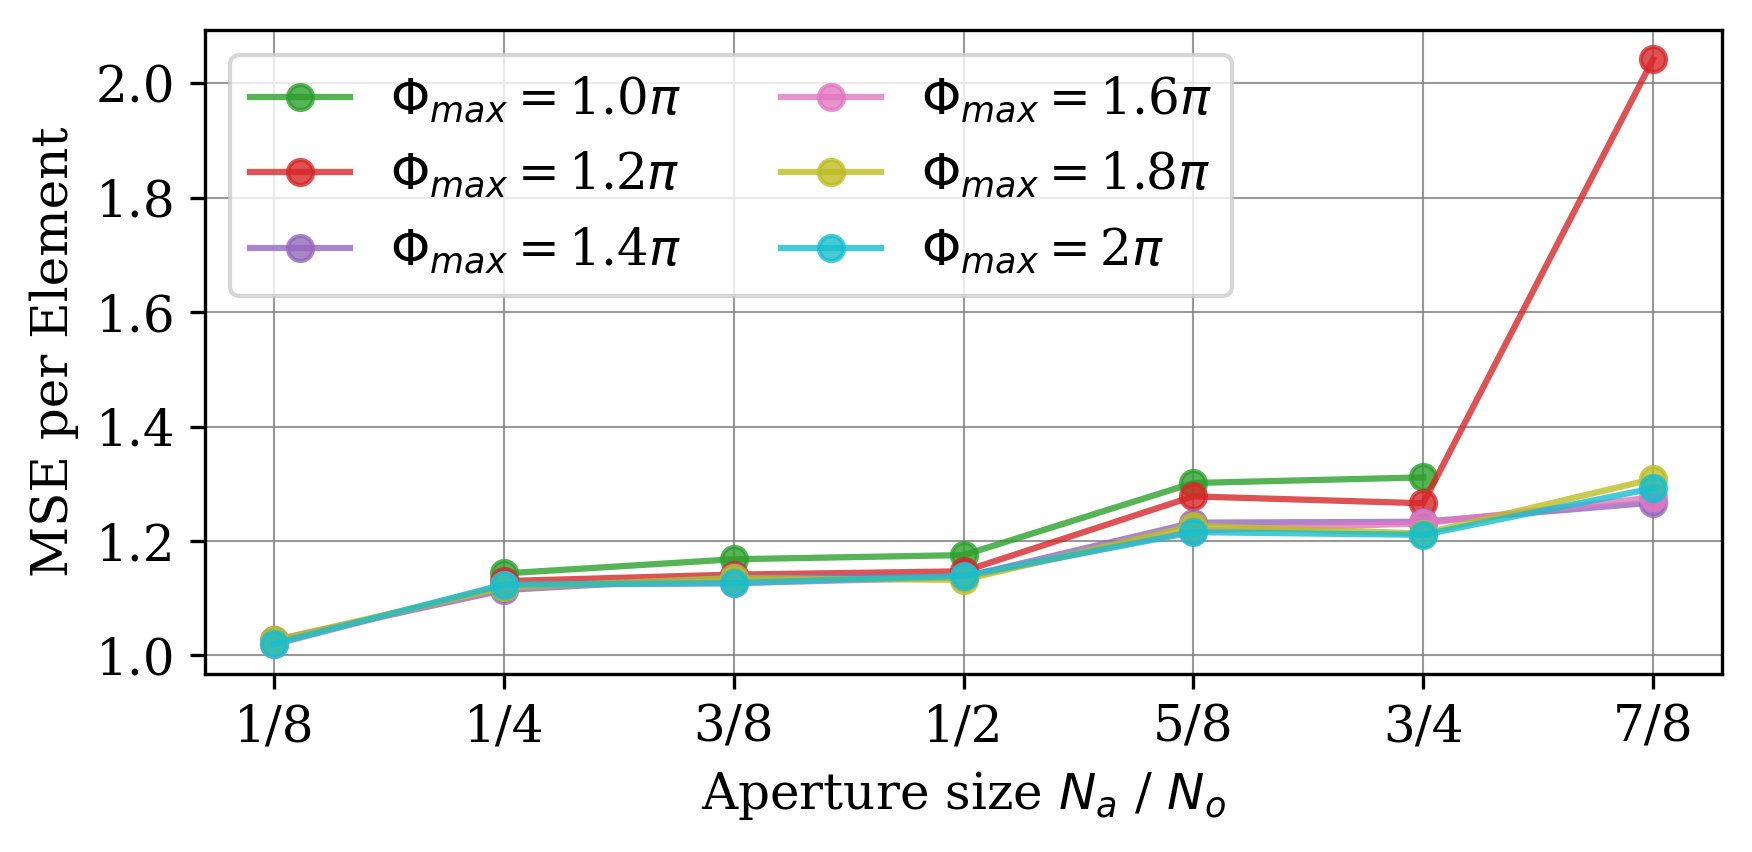

In [6]:
ol_ratio = [f'{Fraction(ol)}' for ol in ratio_aperture_obj]
fig, ax = plt.subplots()

for N_phi in [0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    [MSE_cpx_list, MSE_ang_list, MSE_amp_list, PSNR_ang_list, PSNR_amp_list]= np.load(f'./{out_dir}/mse_vs_aperture_size_phi{N_phi}.npy')    

    ax.plot(ol_ratio, MSE_ang_list, '-o',  label=r'$\Phi_{max}=$' + f'{N_phi*2}'r'$\pi$', alpha=0.8)

    ax.grid(which='both', color='gray', linestyle='-', linewidth=0.5, alpha=0.8)
    ax.grid(which='minor', alpha=0.3)
    ax.set_xticks(ticks=ol_ratio, labels=ol_ratio)
    ax.set_xlabel(r'Aperture size $N_a$ / $N_o$')
    ax.set_ylabel('MSE per Element')

    ax.legend(ncol=2)


plt.tight_layout()
plt.savefig(f'./{out_dir}/mse_vs_aperture_size_complexity.pdf', format="pdf")
plt.show()
